# Introduction

Naive Bayes is the most simple algorithm that you can apply to your data. As the name suggests, here this algorithm makes an assumption as all the variables in the dataset is “Naive” i.e not correlated to each other.

Naive Bayes is a very popular classification algorithm that is mostly used to get the base accuracy of the dataset.

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
for dirname, _, filenames in os.walk('../../data'):
    for filename in filenames:
        print(os.path.join(dirname, filename).replace('\\','/'))

../../data/clean-twitter_en.csv
../../data/clean_kaggle.csv
../../data/clean_public.csv
../../data/cyberbullying_tweets.csv
../../data/hate_speech.csv
../../data/labeled_tweets.csv
../../data/NAACL_SRW_2016.csv
../../data/public_data_labeled.csv
../../data/twitter_en.csv


In [3]:
df = pd.read_csv('../../data/hate_speech.csv',index_col=0)
df = df[~df['text'].isnull()]
df.drop_duplicates(inplace=True)
df.shape
# df.head()

,id,follower_count,friends_count,retweet_count,favorite_count,text,word_length,label
0,13857342,20161,780,0,0,trying least targeting specific group cause tr...,10,0
1,13857342,20161,780,0,4,saw fly stats display time tweetstats hashtag ...,13,0
2,82522377,4,64,0,1,sauce capsicum stock packet jar quality cookin...,15,1
3,13857342,20161,780,1,30,think going play video game day super stressfu...,11,0
4,930620467,18807,263,0,0,fight systemic problem time offering real tip ...,11,0


# Ont-hot encoding

We leveraged only the text data to predict the hate speech in this case. One-hot encoding and tf-idf are two popular and widely used encoding methods to transfer the words into vectors. Both methods get rid of meaning of the words orders,

In [5]:
# transfer the raw text data into matrix
cv = CountVectorizer(analyzer='word',min_df=0.001)
content  = df.text
vector = cv.fit_transform(content)
data = vector.toarray()
index_name = cv.get_feature_names_out()
tfidf = TfidfTransformer()
x_tf = tfidf.fit_transform(vector)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x,y = sm.fit_resample(x_tf, df['label'])

# SMOTE algorithm

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x,y = sm.fit_resample(x_tf, df['label'])

# Model training

In [21]:
# train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
clf = MultinomialNB()
clf.fit(X_train,y_train)
y_pre = clf.predict(X_test)
accuracy_score(y_test,y_pre)

# confusion matrix

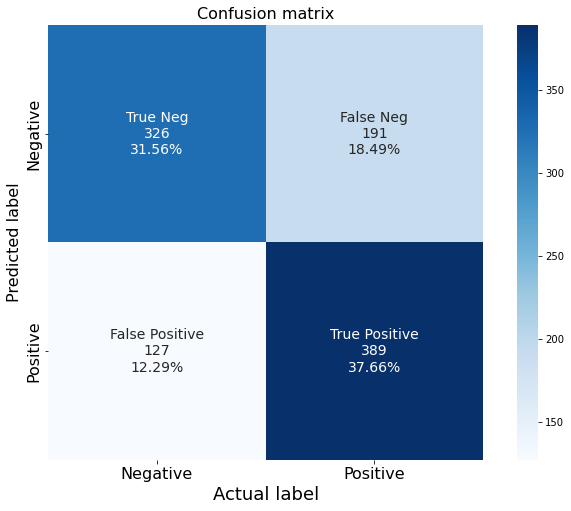

In [23]:
#confusion matrix
from matplotlib.pyplot import xticks
from sklearn.metrics import confusion_matrix
fig,ax = plt.subplots(figsize=(12,8))
mx = confusion_matrix(y_test,y_pre)
# cmd = ConfusionMatrixDisplay(mx,display_labels=['Positive','Negative'])
group_names = ['True Neg','False Neg','False Positive','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                mx.flatten()]
group_percentages = ["{:.2%}".format(value) for value in mx.flatten()/np.sum(mx) ]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.array(labels).reshape(2,2)
sns.heatmap(data=mx,annot=labels,fmt='',cmap='Blues',square=True,annot_kws={"fontsize":14})
ax.set_title('Confusion matrix',fontsize=16)
plt.xlabel('Actual label',fontsize=18)
plt.ylabel('Predicted label',fontsize=16)
ax.set_xticklabels(['Negative','Positive'],fontsize=16)
ax.set_yticklabels(['Negative','Positive'],fontsize=16)
plt.savefig('./confusion_matrix.png')

# Learning Curve

In [29]:
from sklearn.model_selection import learning_curve
train_sizes=np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, test_scores,a,b = learning_curve(
        estimator=MultinomialNB(),
        X=X_train,
        y=y_train,
        scoring='accuracy',
        cv=5,
        n_jobs=1,
        train_sizes=train_sizes,
        return_times=True,
    )
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
# fit_times_mean = np.mean(fit_times, axis=1)
# fit_times_std = np.std(fit_times, axis=1)# Plot learning curve
# learning curve


In [ ]:
from sklearn.model_selection import learning_curve
fig,ax = plt.subplots(figsize=(20,8))

ax.grid()
ax.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
ax.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
ax.plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
)
ax.plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
)
FS = 14
ax.legend(loc="best",fontsize=FS)
ax.set_title('Learning Curve(Naive Bayes)',fontsize=FS)
ax.set_xlabel('traning_example',fontsize=FS)
ax.set_ylabel('accuracy score',fontsize=FS)
plt.show()

# ROC Curve

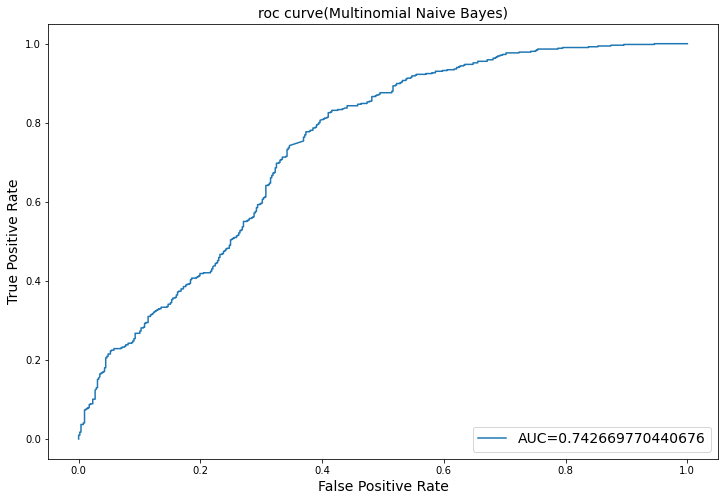

In [31]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
plt.figure(figsize=(12,8))
y_pred_prob = clf.predict_proba(X_test)[::,1]
fpr, tpr, threshold = roc_curve(y_test,y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('roc curve(Multinomial Naive Bayes)',fontsize=FS)
plt.ylabel('True Positive Rate',fontsize=FS)
plt.xlabel('False Positive Rate',fontsize=FS)
plt.legend(loc='lower right',fontsize=FS)
plt.show()